# EDA about the cap rates of the cities

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
df = pd.read_csv('../tables/final_csv.csv')

In [93]:
# top ten values
top_ten_max = df.nlargest(10, 'cap rate')
print(top_ten_max)

                city        house type  house_area  garden_area  rooms  \
3740        tel aviv         apartment       350.0          0.0    6.0   
33020      ramat gan         apartment        70.0          0.0    3.0   
11310       tel aviv  garden apartment       100.0          0.0    4.0   
31197       ashkelon         apartment       156.0          0.0    5.0   
3370        tel aviv         apartment       350.0          0.0    6.0   
16078       ashkelon         apartment       156.0          0.0    5.0   
24966       tel aviv         apartment        98.0          0.0    4.0   
12226       tel aviv         apartment        80.0          0.0    3.0   
14573  rishon lezion         apartment       118.0          0.0    4.0   
8501        ashkelon         apartment       154.0          0.0    5.0   

       balconies  air_condition  parking  protected_room  elevator  renovated  \
3740         3.0            0.0      0.0             0.0       0.0        0.0   
33020        1.0       

## remove outliers:

In [94]:
df = df[df['cap rate'] < 10]

In [96]:
average_by_category = df.groupby(['city'])['cap rate'].mean().sort_values(ascending=False)
print(average_by_category)

city
beer sheva       3.470389
haifa            3.245550
natanya          2.982118
ashkelon         2.973038
ashdod           2.928389
rishon lezion    2.889718
jerusalem        2.884916
petah tikva      2.872228
ramat gan        2.767031
tel aviv         2.542400
Name: cap rate, dtype: float64


In [97]:
city_rooms_capRate = df.groupby(['city', 'rooms'])['cap rate'].mean().sort_values(ascending=False)
print(city_rooms_capRate)

city           rooms
haifa          10.0     4.783333
natanya        8.5      4.717000
rishon lezion  7.5      3.894200
beer sheva     2.0      3.846337
               2.5      3.782271
                          ...   
haifa          12.0     1.603000
rishon lezion  10.5     1.556000
tel aviv       11.0     1.550000
               7.5      1.516000
ashkelon       8.5      1.413000
Name: cap rate, Length: 176, dtype: float64


In [98]:
result_df = city_rooms_capRate.reset_index()
result_df.to_csv('../tables/city_rooms_capRate.csv', index=False)

## ploting

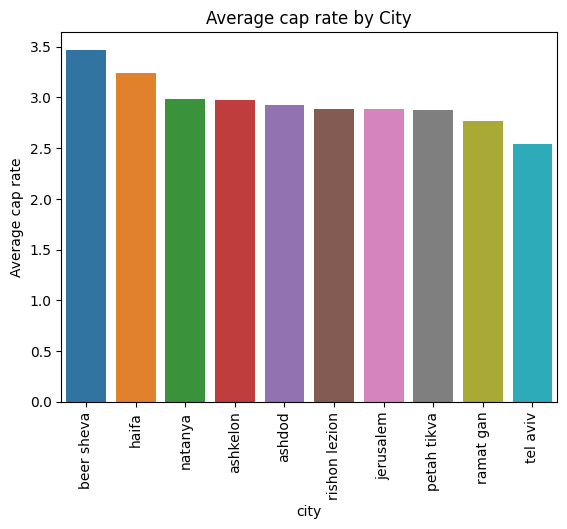

In [99]:
average_cap_by_city = df.groupby('city')['cap rate'].mean().sort_values(ascending=False).reset_index()

# Plot the average price by city using seaborn
sns.barplot(x='city', y='cap rate', data=average_cap_by_city)

# Set plot labels
plt.xlabel('city')
plt.ylabel('Average cap rate')
plt.title('Average cap rate by City')
plt.xticks(rotation=90)
# Display the plot
plt.show()

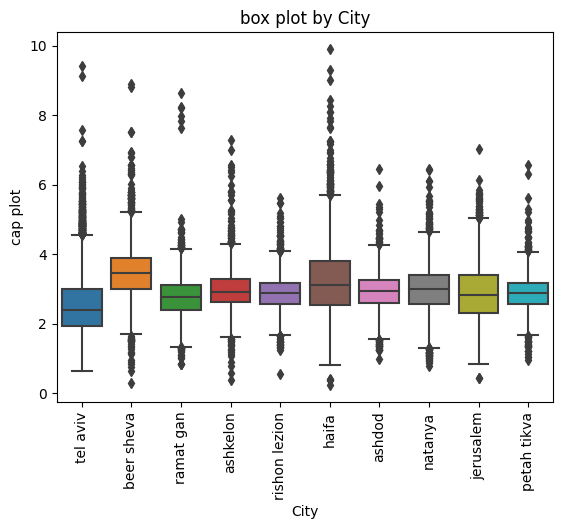

In [100]:
sns.boxplot(x='city', y='cap rate', data=df)

# Set plot labels
plt.xlabel('City')
plt.ylabel('cap plot')
plt.title('box plot by City')
plt.xticks(rotation=90)
# Display the plot
plt.show()

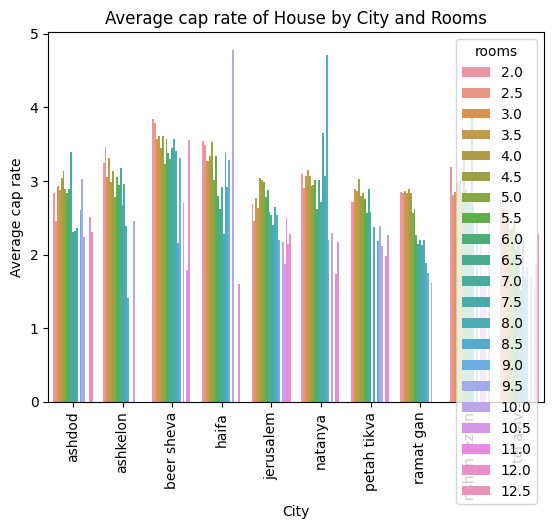

In [101]:
average_price = df.groupby(['city', 'rooms'])['cap rate'].mean().reset_index()
##DEB887
# Plot the average price by city and rooms using seaborn
sns.barplot(x='city', y='cap rate', hue='rooms', data=average_price)

# Set plot labels
plt.xlabel('City')
plt.ylabel('Average cap rate')
plt.title('Average cap rate of House by City and Rooms')
plt.xticks(rotation=90)
# Display the plot
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-color:black; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Conclusion:</font></h3>

* We can clearly see that Beer Sheva has the top cap rate
    
* Haifa has some outliers that exceeding Beer Sheva
